### In this notebook we will analyze the wine quality dataset
    1. Begin with red wine data-set
    2. Analyze the types of features
    3. Encode the features if needed

In [11]:
__author__ = 'Debajyoti Majumdar'
__email__ = 'debajyoti94@gmail.com'
__dataset__ = 'UCI_wine_quality'

In [4]:
import pandas as pd #PANDAS for reading and analyzing the .csv file 


from matplotlib import pyplot #MATPLOTLIB for making plots

from sklearn.preprocessing import MinMaxScaler #THIS IS FOR FEATURE SCALING OPS

In [5]:
wine_dataset = pd.read_csv('../input/winequality-red.csv', delimiter=';')

In [6]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine_dataset.shape

(1599, 12)

- Quality is the output variable

- Now analysing the input features

In [8]:
wine_dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Examine basic statistics of the features**

In [9]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


'yeah we see quite some features having different range of values.\nit might be a good idea to normalize/standardize these features and get them to a common scale\nthis is because we do not want any one feature to skew the results to one particular direction, \neventhough it might not be a bad idea'

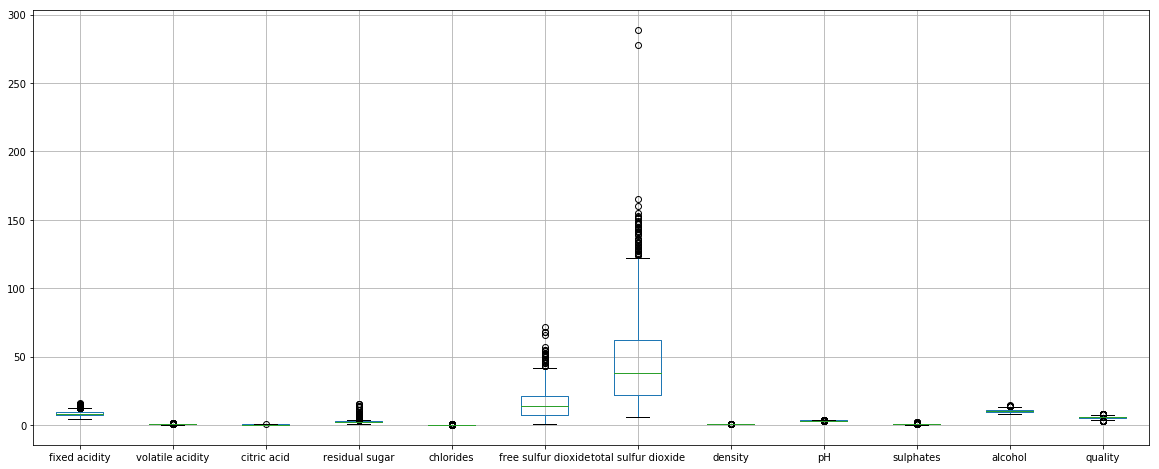

In [10]:
#MAYBE  A BOX PLOT IS BETTER TO UNDERSTAND THE ABOVE TABLE
pd.DataFrame.boxplot(wine_dataset, figsize=(20,8)) 
'''yeah we see quite some features having different range of values.
it might be a good idea to normalize/standardize these features and get them to a common scale
this is because we do not want any one feature to skew the results to one particular direction, 
eventhough it might not be a bad idea''' 

**The wine quality has min value 3 and max value 8**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4fa747780>,
      dtype=object)

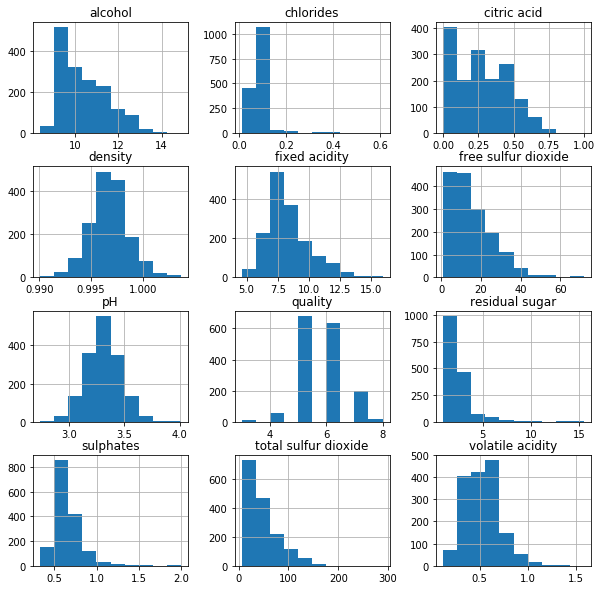

In [11]:
wine_dataset.hist(figsize=(10,10))

- From the histogram plots we see that only "pH" and "density" seem to be are normally distributed through visuals. 
- Although some of the features are highly skewed, such as residual sugar, total sulfur dioxide, sulphates
- We will not apply any log transformation now to normalize the data, if needed we will do this later

In [12]:
# LET US SEE IF THERE ARE ANY NULL VALUES IN THE DATASET
wine_dataset.isnull().sum() # GOOD TO KNOW THAT THERE ARE NO NULL VALUES, SO NO NEED FOR DATA IMPUTATION

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Feature scaling
- Feature scaling can be of two types, one is MinMax scaling, which divides the feature by the max value
- and the other is Standard scaling, which divides the feature value by the std. deviation
- These feature transformation techniques do not change the distribution of the data
- Performing this operation here only for EDA purposes, will add this functionality to the src code while data preprocessing.

In [55]:
# select all but output column while scaling
columns =wine_dataset.columns.drop('quality')
wine_dataset_scaled = wine_dataset
scaler = MinMaxScaler()
wine_dataset_scaled[columns] = scaler.fit_transform(wine_dataset[columns])

In [58]:
wine_dataset_scaled.shape
type(wine_dataset_scaled)

pandas.core.frame.DataFrame

In [61]:
wine_dataset_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4f6a15278>,
      dtype=object)

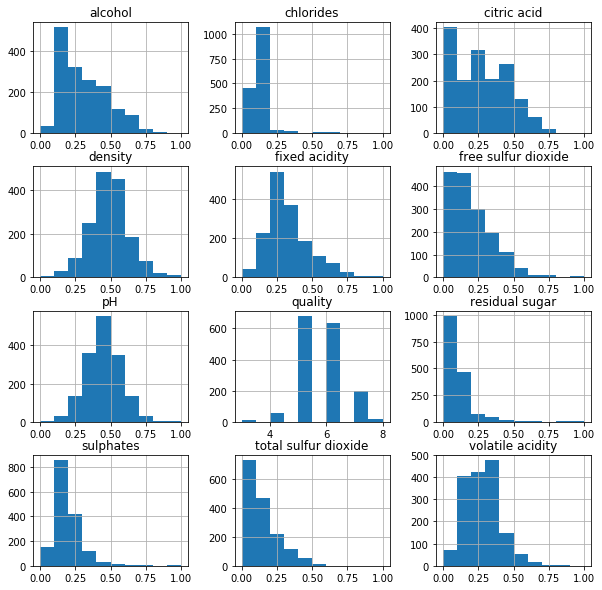

In [63]:
#PLOTTING SCALED FEATURES
wine_dataset_scaled.hist(figsize=(10,10))